In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset 

In [2]:
df = pd.read_csv(r"C:\Users\Vyas\1_Assignment\Projects\Other Projects\Car_Price_Prediction\car_prediction_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Cheking the shape and other details of the dataset 

In [3]:
print("No of rows are: ", df.shape[0])
print("No of columns are: ", df.shape[1])

No of rows are:  301
No of columns are:  9


#### Finding the unique values in each feature

In [4]:
for col in df:
    print(f'{col}: {df[col].unique()}')

Car_Name: ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'H

#### Checking the null values in the dataframe

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

#### Checking the statistical datas of the dataframe

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df1=df.drop('Car_Name',axis=1)
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Getting number of years in considering current year is 2022

In [8]:
df1['current_year']=2022
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [9]:
df1['No_of_years']=df1['current_year']-df1['Year']
df1.drop(['Year','current_year'],axis=1,inplace=True)
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


##### Performing encoding to get data in numerical form out of categorical

In [10]:
df = pd.get_dummies(df1,drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


##### Checking the corelation between the features

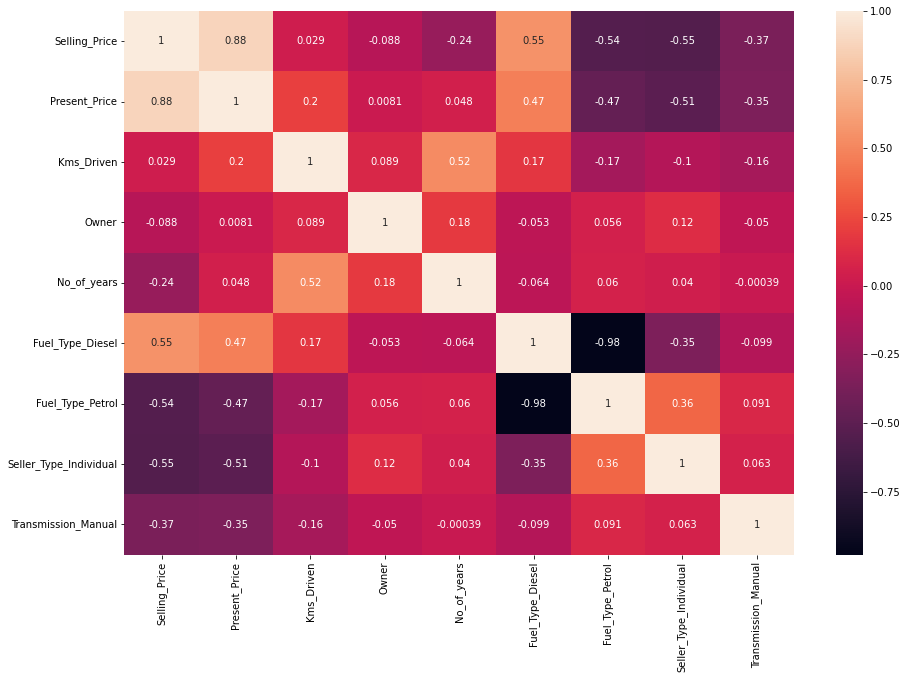

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True);

We can see that price depends lot on type of fuel, seller and present price.

#### Splitting the dataset into Independent and Dependent Columns

In [12]:
X = df.drop('Selling_Price', axis=1)
y = df[['Selling_Price']]

## Feature Importance

In order to check feature which are important for the dataset, we will use extra tree regressor

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X,y)

ExtraTreesRegressor()

In [15]:
print(etr.feature_importances_)

[3.50345968e-01 4.42883061e-02 2.58868434e-04 7.45621927e-02
 2.32207182e-01 1.40169776e-02 1.27184021e-01 1.57136484e-01]


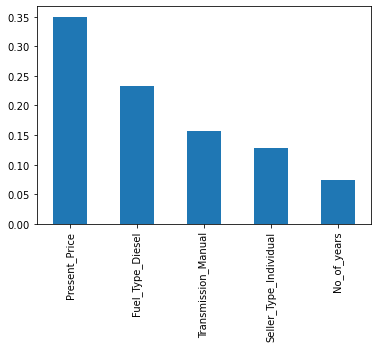

In [16]:
importance = pd.Series(etr.feature_importances_,index=X.columns)
importance.nlargest().plot(kind='bar')
plt.show()

We can see that Present Price and whether car is diesel or not impacts most on the selling price of the car

In [17]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Model Making

Using different models for best outcome

#### Random Forest Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor()

In [19]:
from sklearn.model_selection import RandomizedSearchCV

In [20]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [21]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [22]:
rf = RandomizedSearchCV(estimator = rfmodel,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=6, n_jobs=1)

In [23]:
rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1200; total time=   2.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1200; total time=   2.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=6, scoring='neg_mean_squared_error', verbose=2)

In [24]:
rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 25}

In [25]:
rf.best_score_

-3.930948217119431

In [26]:
prediction = rf.predict(X_test)
prediction = prediction.reshape(91,1)

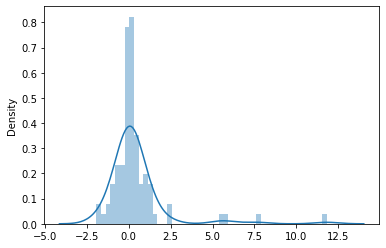

In [27]:
sns.distplot(y_test-prediction);

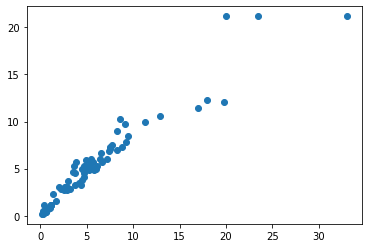

In [28]:
plt.scatter(y_test,prediction);

In [29]:
from sklearn import metrics

In [30]:
print('MAE: ', metrics.mean_absolute_error(y_test,prediction))
print('MSE: ', metrics.mean_squared_error(y_test,prediction))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  0.8406332683266393
MSE:  3.4088992896649595
RMSE:  1.8463204731749467


#### XGBoost Regressor

In [31]:
import xgboost as xgb
from scipy.stats import uniform, randint

In [32]:
xgbr = xgb.XGBRegressor(objective='reg:linear', random_state=6)

In [33]:
params = {
    "gamma": uniform(0,0.5),
    "learning_rate": uniform(0.01,0.3),
    "max_depth": randint(2,6),
    "n_estimators": randint(100,150),
    "subsample": uniform(0.6,0.4)
}

In [34]:
xgb_model = RandomizedSearchCV(estimator = xgbr,param_distributions=params,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=6,n_jobs=1)

In [35]:
xgb_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[17:41:11] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0.4464300757180008, learning_rate=0.10959394159035316, max_depth=4, n_estimators=145, subsample=0.6166786502900999; total time=   0.0s
[17:41:11] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0.4464300757180008, learning_rate=0.10959394159035316, max_depth=4, n_estimators=145, subsample=0.6166786502900999; total time=   0.0s
[17:41:12] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0.4464300757180008, learning_rate=0.10959394159035316, max_depth=4, n_estimators=145, subsample=0.6166786502900999; total time=   0.0s
[17:41:12] WARNING: c:\c

[CV] END gamma=0.027237253911177317, learning_rate=0.2255911709692583, max_depth=4, n_estimators=102, subsample=0.8465906432543151; total time=   0.0s
[17:41:15] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0.027237253911177317, learning_rate=0.2255911709692583, max_depth=4, n_estimators=102, subsample=0.8465906432543151; total time=   0.0s
[17:41:15] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0.027237253911177317, learning_rate=0.2255911709692583, max_depth=4, n_estimators=102, subsample=0.8465906432543151; total time=   0.0s
[17:41:15] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0.2212552522902818, learning_rate=0.18278570560699142, max_depth=3,

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002BC650070D0>,
                                        'max_depth': <scip

In [36]:
xgb_model.best_score_

-2.5128024405997165

In [37]:
xgb_model.best_params_

{'gamma': 0.3938048804972672,
 'learning_rate': 0.2319582556165887,
 'max_depth': 3,
 'n_estimators': 118,
 'subsample': 0.9191305099050686}

In [38]:
y_pred = xgb_model.predict(X_test)
y_pred = y_pred.reshape(91,1)

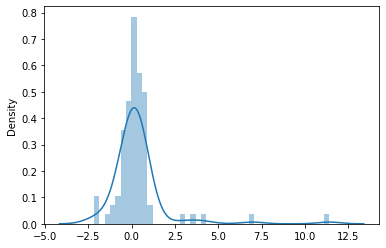

In [39]:
sns.distplot(y_test-y_pred);

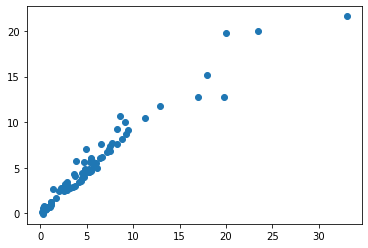

In [40]:
plt.scatter(y_test,y_pred)
plt.show()

In [41]:
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ', metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:  0.7548941758504281
MSE:  2.7644977967025777
RMSE:  1.66267789926449


#### Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lrmodel = LinearRegression()

In [45]:
lrmodel.fit(X_test,y_test)

LinearRegression()

In [47]:
lr_y = lrmodel.predict(X_test)

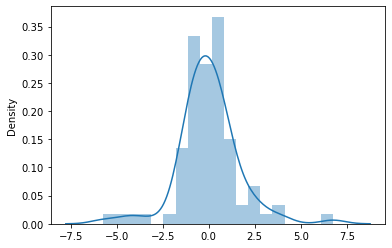

In [48]:
sns.distplot(y_test-lr_y);

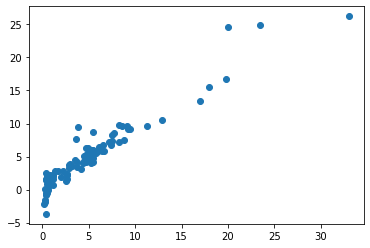

In [50]:
plt.scatter(y_test,lr_y);
plt.show()

In [51]:
print('MAE: ', metrics.mean_absolute_error(y_test,lr_y))
print('MSE: ', metrics.mean_squared_error(y_test,lr_y))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,lr_y)))

MAE:  1.1327974310809354
MSE:  2.7219041489679245
RMSE:  1.6498194292006396


We can clearly see that XGBoost works best on this data set compared to Random Forest Regressor and Linear Regression.
Linear Regression does have less RMSE but more MAE and also when we check graphs we can say that XGBoost is better reliable.
But Linear Regression is better than Random Forest Regressor for this particular dataset.